In [1]:
def skew(string):
    sk = 0
    r = [0]
    mins = [0]
    minimum = 0 
    for i in range (0,len(string)): 
        if string[i] == 'G':
            sk = sk + 1 
        if string[i] == 'C':
            sk = sk - 1
        r.append(sk)
        
        if sk == minimum :
            mins.append(i+1)  
            
        if sk < minimum:
            mins.clear()
            minimum = sk
            mins.append(i+1)
     
        

    return r, mins

In [2]:

with open('D:\Mobina\Desktop\Salmonella_enterica.txt', 'r') as file:
    text = (file.read()).replace('\n', '')

skews, mins = skew(text)
print(*(mins))


3764856 3764858


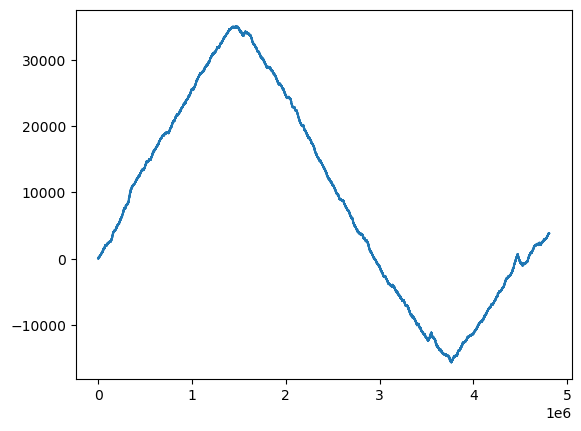

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(skews)
plt.show()


In [4]:
l = 200
ori = text[mins[0]: mins[len(mins)-1] + l]

In [5]:
ori

'GCGGTACGTTTCGGCGCAATTGGCATTGGCAGTCGAGAATACGACACGTTTTGCGGCGCGATTGAGAAAATAGAAGCGGAACTGAAAGGCGCTGGCGCAAAACAGGTTGGGGAAACACTGAAGATCAACATCCTTGAACATGAGATTCCGGAAGATCCAGCGGAGATTTGGCTCGGATCCTGGATTAATTTACTCAAATAAG'

In [6]:
def hamming(str1, str2):
    dist = 0
    for i in range (len(str1)):
        if str1[i] != str2[i]: 
            dist = dist + 1
    return dist
        

In [7]:
def reverse_complement(txt):
    rvcp = ''
    dict = {'C':'G', 'A':'T', 'G':'C', 'T':'A'}
    for i in range(len(txt)): 
        rvcp = dict[txt[i]] + rvcp
    return rvcp

In [8]:
def apx_pattern(pattern, string2, d):
    li = []
    for i in range(len(string2) - len(pattern) + 1):
        dist = hamming(string2[i:i+len(pattern)] , pattern)
        if dist <= d:
            li.append(i)
            
    return len(li)   

In [9]:
def suffix(pattern):
    return pattern[1:]

def first_symbol(pattern):
    return pattern[0]

def neighbors(pattern, d):
    if d == 0:
        return {pattern}
    if len(pattern) == 1:
        return {'A', 'C', 'G', 'T'}

    neighborhood = set()
    suffix_neighbors = neighbors(suffix(pattern), d)

    for text in suffix_neighbors:
        if hamming(suffix(pattern), text) < d:
            for nucleotide in 'ACGT':
                neighborhood.add(nucleotide + text)
        else:
            neighborhood.add(first_symbol(pattern) + text)

    return list(neighborhood)

In [10]:
from collections import Counter
def count(text, k, d): 
    freq_map= {}
    freq_map_rc = {}
    freq_neighs = {}
    freq_neighs_rc = {}
    tot_map = {}
    total_map = {}
    b = 0
    for i in range(5):
        pat = text[i:i+k]
        rc_pat = reverse_complement(pat)
 
        freq_map = count_pat(text, pat, k, d, freq_map)
        freq_map_rc = count_pat(text, rc_pat, k, d, freq_map_rc)
        
    tot_map = Counter(freq_map)
    tot_map.update(freq_map_rc)
    
    for x in tot_map.keys(): 
        for y in tot_map.keys():
            if x == reverse_complement(y) and x != y:
                total_map[x] = tot_map[x] + tot_map[y]
                total_map[y] = tot_map[x] + tot_map[y]
            if x == reverse_complement(y) and x == y:
                total_map[x] = tot_map[x]  * 2
        
    return total_map

In [11]:
def count_pat(text, pat, k, d, freq_map):
    
    if pat in freq_map.keys():
        freq_map[pat] = apx_pattern(pat, text, d) + freq_map[pat]
    else: 
        freq_map[pat] = apx_pattern(pat, text, d)
    

    neighborhood = neighbors(pat, d)

    for i in neighborhood: 
        if  i in freq_map.keys() and i != pat:
            freq_map[i] = freq_map[i] + 1
        else: 
            freq_map[i] = 1

    return freq_map

In [12]:

    
result= []
most = 0
map_freq = count(ori, 9, 1) 

most_freq = []

for i in map_freq.keys(): 
    if map_freq[i] > most: 
        most_freq.clear()
        most = map_freq[i]
        most_freq.append(i)
    elif map_freq[i] == most:
        most_freq.append(i)

r = ''
for x in most_freq:
    r = r + ' '+ x
print(r)   


 GCGGTACGT ACGTACCGC ACGGTACGT ACGTACCGT GCGGTAAGT ACTTACCGC GAGGTACGT ACGTACCTC GCGGTACGG CCGTACCGC GCGGTACCT AGGTACCGC GCGGTACGA TCGTACCGC GCGGTACAT ATGTACCGC GCGGTCCGT ACGGACCGC GCGGTATGT ACATACCGC GCTGTACGT ACGTACAGC GCGCTACGT ACGTAGCGC GCGATACGT ACGTATCGC GCGGTAGGT ACCTACCGC CCGGTACGT ACGTACCGG GCGTTACGT ACGTAACGC TCGGTACGT ACGTACCGA GCGGAACGT ACGTTCCGC GCGGCACGT ACGTGCCGC GCCGTACGT ACGTACGGC GCAGTACGT ACGTACTGC GCGGGACGT ACGTCCCGC GCGGTGCGT ACGCACCGC GCGGTACTT AAGTACCGC GCGGTACGC GCGTACCGC GGGGTACGT ACGTACCCC GTGGTACGT ACGTACCAC GCGGTTCGT ACGAACCGC CGGTACGTT AACGTACCG CCGTACGTT AACGTACGG CGGTAAGTT AACTTACCG TGGTACGTT AACGTACCA CGCTACGTT AACGTAGCG CGGTCCGTT AACGGACCG CGATACGTT AACGTATCG CGGGACGTT AACGTCCCG CTGTACGTT AACGTACAG CGGTATGTT AACATACCG CGGTACGCT AGCGTACCG CGGTGCGTT AACGCACCG CGGTTCGTT AACGAACCG CGGCACGTT AACGTGCCG CGGTACATT AATGTACCG CGGAACGTT AACGTTCCG CGTTACGTT AACGTAACG CAGTACGTT AACGTACTG CGGTAGGTT AACCTACCG CGGTACGGT ACCGTACCG GGGTACGTT AACGTACCC CGGTACTTT AAAGTACCG